# Mean Difference with Temperature Dataset

Finding mean difference between four models for DJF seaoson.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

### Loading datasets

In [2]:
# temperature wrf datasets
ds_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.tas.1980-2012.nc')
ds_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_wrf.monthly.tas.2091-2100.nc')

# temperature loca_wrf
ds_loca_wrf_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.tas.1980-2012.nc')
ds_loca_wrf_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_wrf.monthly.tas.2091-2100.nc')

# Temperature _loca_14
ds_loca_14_1980 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.tas.1980-2012.nc')
ds_loca_14_2091 = xr.open_dataset('./data/DOE_VIC.narr_LOCA_L14.monthly.tas.2091-2100.nc')

# Temperature _bcsd_L14
ds_bcsd_L14_1980 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.tas.1980-2012.nc')
ds_bcsd_L14_2091 = xr.open_dataset('./data/DOE_VIC.narr_BCSD_L14.monthly.tas.2091-2100.nc')

In [3]:
# Export to pandas and check for not null values
#ds_wrf_1980['tas']
#test_df = ds_wrf_1980.to_dataframe()
#test_df[test_df['tas'].notnull()]

In [4]:
tas_wrf_from_1991 = ds_wrf_1980['tas'].sel(time=slice('1991-01-01', '2000-12-31'))
tas_loca_wrf_from_1991 = ds_loca_wrf_1980['tas'].sel(time=slice('1991-01-01','2000-12-31'))
tas_loca_14_from_1991 = ds_loca_14_1980['tas'].sel(time=slice('1991-01-01','2000-12-31'))
tas_bcsd_L14_from_1991 = ds_bcsd_L14_1980['tas'].sel(time=slice('1991-01-01', '2000-12-31'))

season_str = 'JJA'

#### Mean difference of narr_wrf

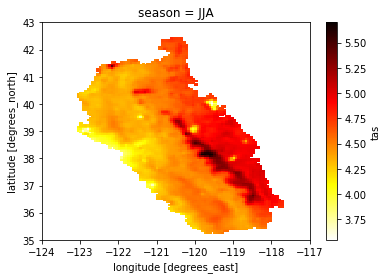

In [5]:
str_groupby = 'time.season'
tas_wrf_1991 = tas_wrf_from_1991.groupby(str_groupby).mean('time')
tas_wrf_2091 = ds_wrf_2091['tas'].groupby('time.season').mean('time')
mean_diff_wrf_1991_2091 = (tas_wrf_2091.sel(season=season_str) - tas_wrf_1991.sel(season='JJA'))  
mean_diff_wrf_1991_2091.plot(cmap='hot_r')

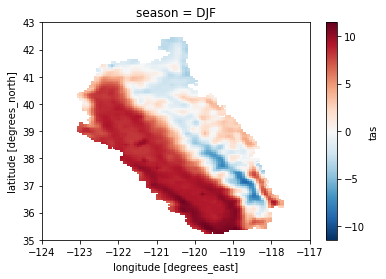

In [6]:
tas_wrf_1991.sel(season='DJF').plot()

#### Mean difference of narr_loca_wrf

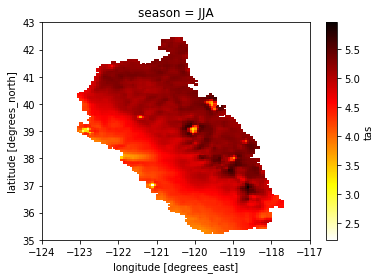

In [7]:
tas_loca_wrf_1991 = tas_loca_wrf_from_1991.groupby('time.season').mean('time')
tas_loca_wrf_2091 = ds_loca_wrf_2091['tas'].groupby('time.season').mean('time')
mean_diff_loca_wrf_1991_2091 = (tas_loca_wrf_2091.sel(season='JJA') - tas_loca_wrf_1991.sel(season='JJA'))
mean_diff_loca_wrf_1991_2091.plot(cmap='hot_r')

In [8]:
tas_loca_wrf_1991.sel(season='DJF')

<xarray.DataArray 'tas' (latitude: 128, longitude: 112)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -123.96875 -123.90625 -123.84375 ...
  * latitude   (latitude) float32 35.03125 35.09375 35.15625 35.21875 ...
    season     <U3 'DJF'

#### Mean difference of narr_loca_14

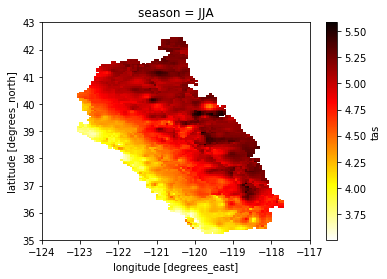

In [9]:
tas_loca_14_1991 = tas_loca_14_from_1991.groupby('time.season').mean('time')
tas_loca_14_2091 = ds_loca_14_2091['tas'].groupby('time.season').mean('time')
mean_diff_loca_14_1991_2091 = ((tas_loca_14_2091.sel(season='JJA') - tas_loca_14_1991.sel(season='JJA')))
mean_diff_loca_14_1991_2091.plot(cmap='hot_r')

#### Mean difference of narr_bcsd_L14

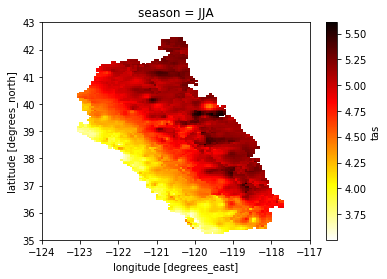

In [10]:
tas_bcsd_L14_1991 = tas_bcsd_L14_from_1991.groupby('time.season').mean('time')
tas_bcsd_L14_2091 = ds_bcsd_L14_2091['tas'].groupby('time.season').mean('time')
mean_diff_bcsd_L14_1991_2091 = (tas_loca_14_2091.sel(season='JJA') - tas_bcsd_L14_1991 .sel(season='JJA'))
mean_diff_bcsd_L14_1991_2091.plot(cmap='hot_r')

## Multi-plots

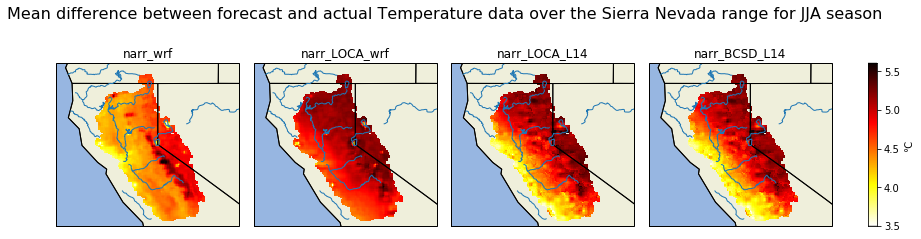

In [11]:
# figsize=(18, 8)
#fig, axes = plt.subplots(nrows=1, ncols=4 )



mean_list = [mean_diff_wrf_1991_2091, mean_diff_loca_wrf_1991_2091, mean_diff_loca_14_1991_2091, mean_diff_bcsd_L14_1991_2091]
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 4),
                axes_pad = 0.2,
                cbar_location="right",
                cbar_mode="single",
                cbar_pad=0.5,
                label_mode='',
                share_all=True
                
               )
cbar_label_title = '℃'


for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.set_extent([-125, -116, 43, 35])
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')    
    test_plt = mean_list[i].plot.pcolormesh(ax=axgr[i], transform=ccrs.PlateCarree(), x='longitude', y='latitude', cmap='hot_r', add_colorbar=False)
    
    

axgr[0].set_title('narr_wrf')
axgr[1].set_title('narr_LOCA_wrf')
axgr[2].set_title('narr_LOCA_L14')
axgr[3].set_title('narr_BCSD_L14')

#make_axes_area_auto_adjustable(axgr[0], pad=0.2, use_axes=[axgr[0], axgr[1], axgr[2], axgr[3]])
fig.subplots_adjust(left=0.14, top=1.64)
fig.suptitle('Mean difference between forecast and actual Temperature data over the Sierra Nevada range for JJA season', fontsize=16, y=1.01)
cb = axgr.cbar_axes[0].colorbar(test_plt)
cb.set_label_text(cbar_label_title)



## Seasonal Temperature over Sierra Nevada

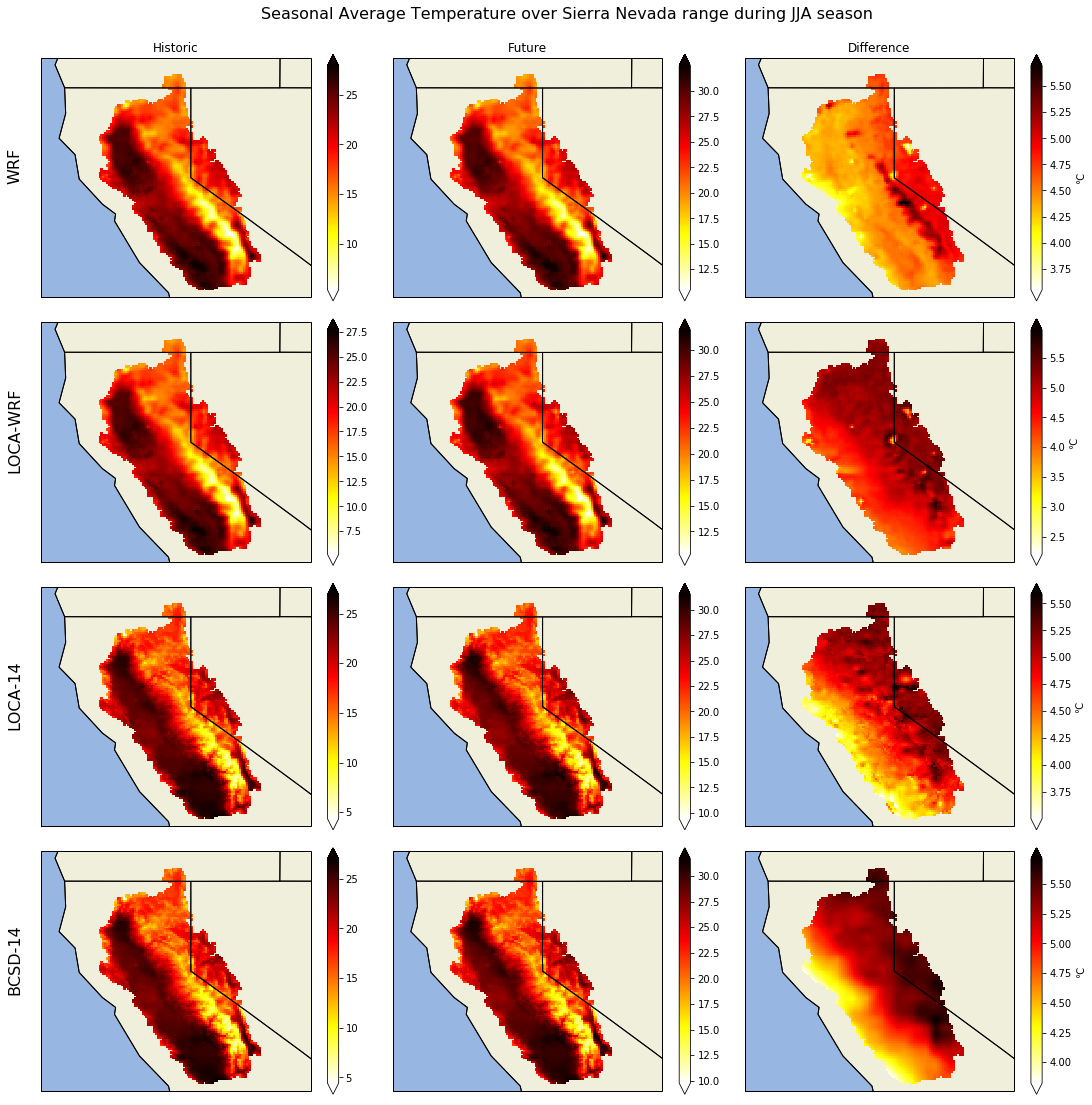

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})
 
# TODO: Refactor this code for any climate variable
season_str = 'JJA'
cbar_label_title = '℃'
cbar_color = 'hot_r'

# Historic Mean Temperature, 1991-01-01 to 2000-12-31
past_mean = [
    tas_wrf_1991.sel(season=season_str), 
    tas_loca_wrf_1991.sel(season=season_str),
    tas_loca_14_1991.sel(season=season_str),
    tas_bcsd_L14_1991.sel(season=season_str)
]

# Future Mean Temperature
future_mean = [
    tas_wrf_2091.sel(season=season_str),
    tas_loca_wrf_2091.sel(season=season_str),
    tas_loca_14_2091.sel(season=season_str),
    tas_bcsd_L14_2091.sel(season=season_str)
]


models = ('WRF', 'LOCA-WRF', 'LOCA-14', 'BCSD-14')
for i, model in enumerate(models):
    # Historic mean plot
    past_mean[i].plot(cmap=cbar_color, add_colorbar=True, ax=axes[i, 0], extend='both', add_labels=False)
    # Future mean plot
    future_mean[i].plot(cmap=cbar_color, add_colorbar=True, ax=axes[i, 1], extend='both', add_labels=False)
    # Difference plot
    diff_plt = future_mean[i] - past_mean[i]
    diff_plt.plot(cmap=cbar_color, ax=axes[i, 2], extend='both', cbar_kwargs={'label': cbar_label_title})
    # Only add titles to the first row of these graphs
    if i > 0:
        axes[i, 0].set_title("")
        axes[i, 1].set_title("")
        axes[i, 2].set_title("")
  
axes[0, 0].set_title('Historic')
axes[0, 1].set_title('Future')
axes[0, 2].set_title('Difference')
my_suptitle = fig.suptitle('Seasonal Average Temperature over Sierra Nevada range during {0} season'.format(season_str), 
                           fontsize=16, 
                           y=1.02)

counter = 0
for i, ax in enumerate(axes.flat):
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.LAND)
    ax.set_extent([-125, -116, 43, 35])
    if(i == 0 or i % 3 == 0):
        ax.text(-0.07, 0.55, '{0}'.format(models[counter]), va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor',
                transform=ax.transAxes, fontsize=16)
        counter = counter + 1
    
plt.tight_layout()
fig.savefig('Temperature during {0} over Sierra Nevada range.png'.format(season_str), dpi=150, bbox_inches="tight")
